## 혼합 분포 군집

__가.__ 개념
* 모형 기반(model-based) 군집방법
* 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정
* k개의 각 모형은 군집이며, 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 만들어짐   
    
    
![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_001.png)

__나.__ 혼합분포모형으로 설명할 수 있는 데이터의 형태
* 다봉형 등   
    
![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_pdf_001.png)

__다.__ 사용 알고리즘: EM (Expectation-Maximization)
* 각 자료에 대해 Z의 조건부분포로부터 조건부 기대값을 구할 수 있음
    - Z의 조건부분포: 어느 집단에 속할지에 대한 확률분포
* 관측변수 X와 잠재변수 Z를 포함하는 (X,Z)에 대한 로그-가능도함수에 Z대신 상수값인 Z의 조건부 기대값을 대입하면, 로그-가능도함수를 최대로 하는 모수를 쉽게 찾을 수 있음
    - 이 추정과정을 "최대가능도추정"이라고 함

* EM 알고리즘의 4단계 정리
    - (1) 초기값 설정: 필요한 모수에 대해 초기값을 선정한다
    - (2) E : 잠재변수 Z의 기대치 계산 (X가 특정 군집에 속할 확률을 계산함)
    - (3) M : 잠재변수 Z의 기대치를 이용해 파라미터를 추정함 (계산된 확률을 통해 모수를 재추정함)
    - (4) 반복 정지: 수렴조건이 만족될 때까지 E와 M을 반복
        * 수렴조건 = 최대가능도(likelihood)가 최대인가?

__라.__ 혼합 분포 군집보형의 특징
* 장점
    - k-means보다 좀 더 통계적으로 엄밀한 결과를 얻을 수 있음 (확률분포 도입)
    - 군집을 몇 개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있음
* 단점
    - 군집의 크기가 너무 작으면 추정의 정도가 떨어짐
    - 데이터가 커지면 EM 알고리즘 적용 시 시간/계산비용 증가 → 사용하기 어려움
    - 이상치자료에 민감하기 때문에 사전에 조치 필요
    - 유형들의 분포가 정규분포와 차이가 크면 결과가 좋지 못함
        * → 그래서 현실에 존재하는 여러 개의 확률 분포를 사용자가 혼합해서 표현함
        * → 몇 개의 확률분포를 혼합할 것인지는 사용자가 지정함. (그 개수에 맞춰서 모델이 만들어짐)

__[예제]__  
iris 데이터의 Species를 제외하고 혼합분포군집분석을 실시하기

In [2]:
# 필요한 모듈
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [3]:
# 데이터 업로드
iris = pd.read_csv('./data/iris.csv')
df = iris.drop('target', axis=1)
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
scaler = StandardScaler()

In [5]:
df_scaled = scaler.fit_transform(df)

In [6]:
# 가우시안 혼합모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)

In [7]:
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
df['gmm_cluster'] = gmm_labels
df['gmm_cluster'].value_counts()

0    55
1    50
2    45
Name: gmm_cluster, dtype: int64

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,gmm_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
# 군집의 변수별 통계량 확인
clusters = [0, 1, 2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


In [12]:
df.groupby('gmm_cluster').var()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,0.385488,0.111434,0.320620,0.083582
1,0.124249,0.145180,0.030106,0.011494
2,0.277707,0.095071,0.195636,0.031091


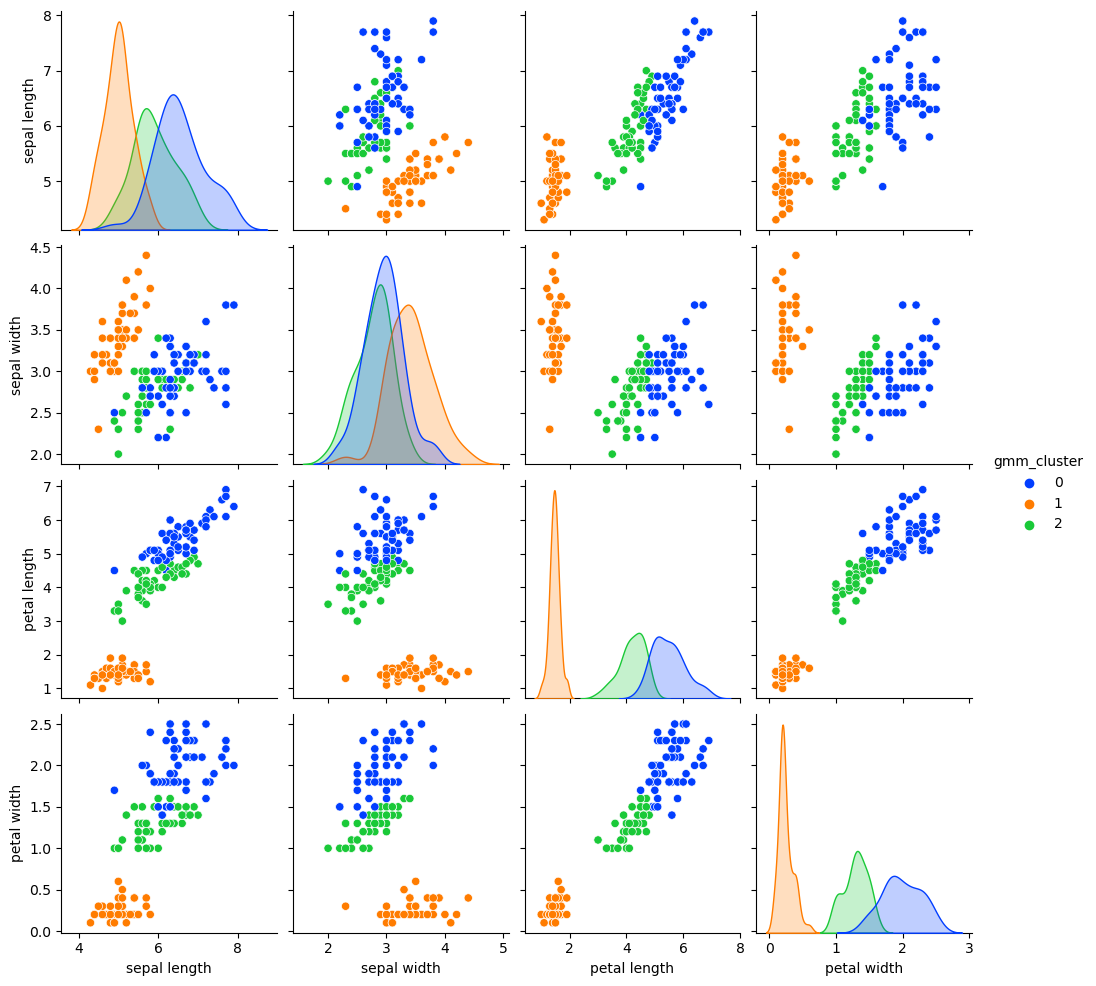

In [17]:
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', palette='bright')
plt.show()

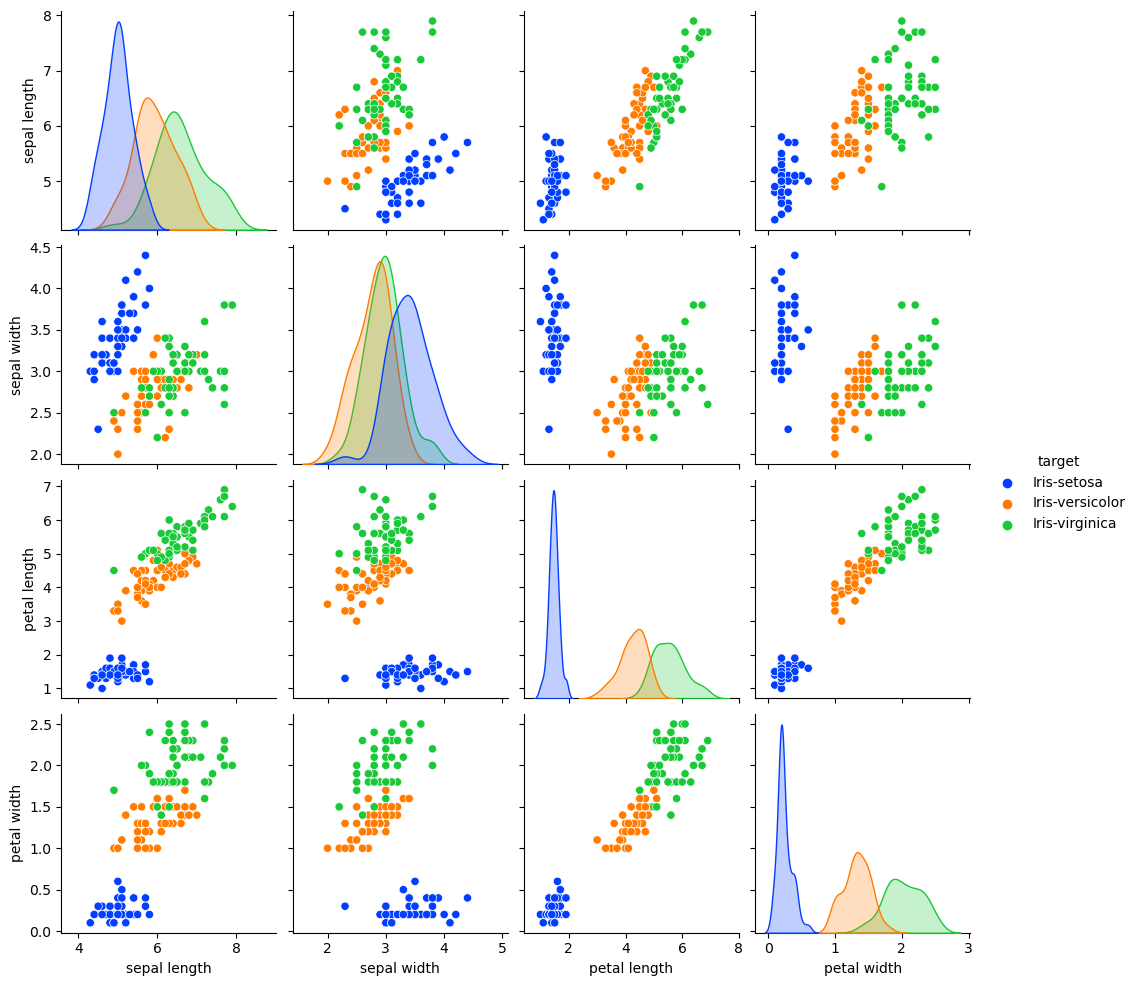

In [19]:
# 원본 target으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(iris, diag_kind='kde', hue='target', palette='bright')
plt.show()